### Instructions

##### 1. Import the necessary libraries.

##### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

##### 3. First look at its main features (head, shape, info).

##### 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

##### 5. Change effective to date column to datetime format.

##### 6. Create a new dataframe using only the numerical data called numerical_df.  Use this for the following questions.

##### 6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

##### 7. Plot a correlation matrix, comment what you see.

##### 8. Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

##### 9. Comment what you can see in the plots.

##### 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

##### 11. Did you find outliers? Comment what you will do with them.  If you decide to remove them, do that now. 

##### 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.

##### 13. Save the numerical_df to csv as numerical.csv   You will use this file again this week.

In [1]:
# 1. Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(data.shape)
data.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# 3. First look at its main features (head, shape, info).

display(data.head(5))
display(data.shape)
# display(data.info)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


(9134, 24)

In [6]:
# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)
cols1=[]
for c in data.columns:
    cols1.append(c.lower())
data.columns = cols1
data.columns


Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [7]:
cols = []
for column in data.columns:
    cols.append(column.replace(' ', '_'))
data.columns = cols
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [8]:
# 5. Change effective to date column to datetime format.
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data['effective_to_date'].head

<bound method NDFrame.head of 0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]>

In [9]:
# 6. Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.
numerical_df = data._get_numeric_data()
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


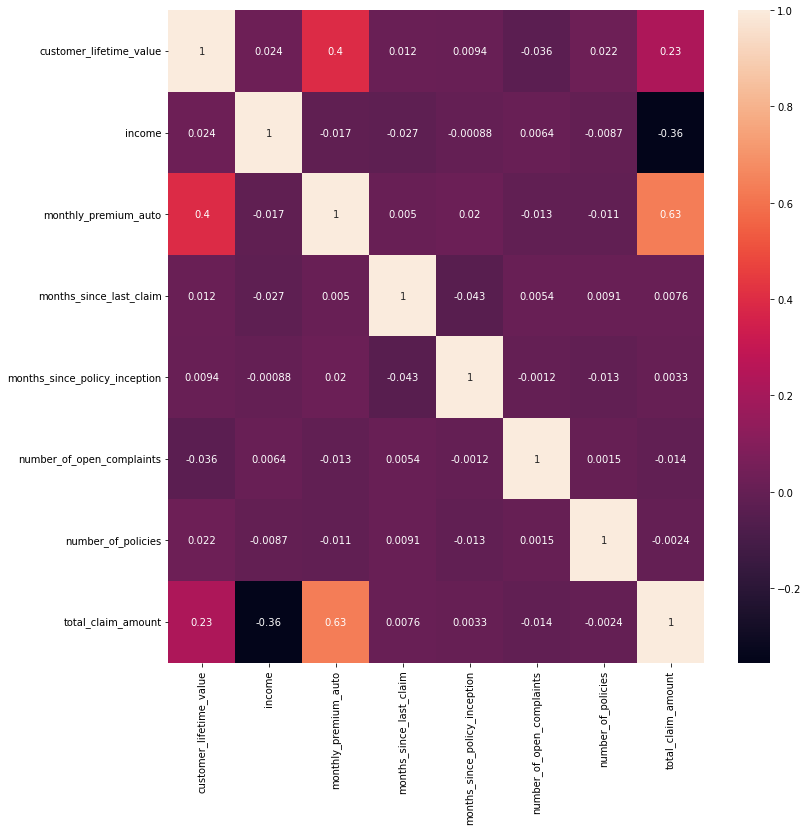

In [10]:
# 7. Plot a correlation matrix, comment what you see.
correlations_matrix = numerical_df.corr()
display(correlations_matrix)
plt.figure(figsize=(12,12))
sns.heatmap(correlations_matrix, annot=True)
plt.show()


In [11]:
numerical_df_corr = numerical_df.corr()['total_claim_amount'][:-1] 
sorted_corr = numerical_df_corr.sort_values(ascending=False)
print("Correlation coefficients with total_claim_amount (in descending order):\n{}".format(sorted_corr))

Correlation coefficients with total_claim_amount (in descending order):
monthly_premium_auto             0.632017
customer_lifetime_value          0.226451
months_since_last_claim          0.007563
months_since_policy_inception    0.003335
number_of_policies              -0.002354
number_of_open_complaints       -0.014241
income                          -0.355254
Name: total_claim_amount, dtype: float64


In [12]:
# 8. Create a function to plot every discrete variable. Do the same with the continuous variables 
# (Be Careful, you may need to change the plot type to one better suited for continuous data!)

# There may be times when it's necessary to pass variables that are not floats or float arrays between components. 
# These variables can be declared as discrete variables. A discrete variable can be any picklable python object.

# As opposed to a continuous variable, a discrete variable can assume only a finite number of real values within a 
# given interval. An example of a discrete variable would be the score given by a judge to a gymnast in competition: 
# the range is 0 to 10 and the score is always given to one decimal




In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
discrete = numerical_df.drop(['customer_lifetime_value', 'income', 'total_claim_amount'], axis=1)
discrete.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [15]:
# Do the same with the continuous variables !!!

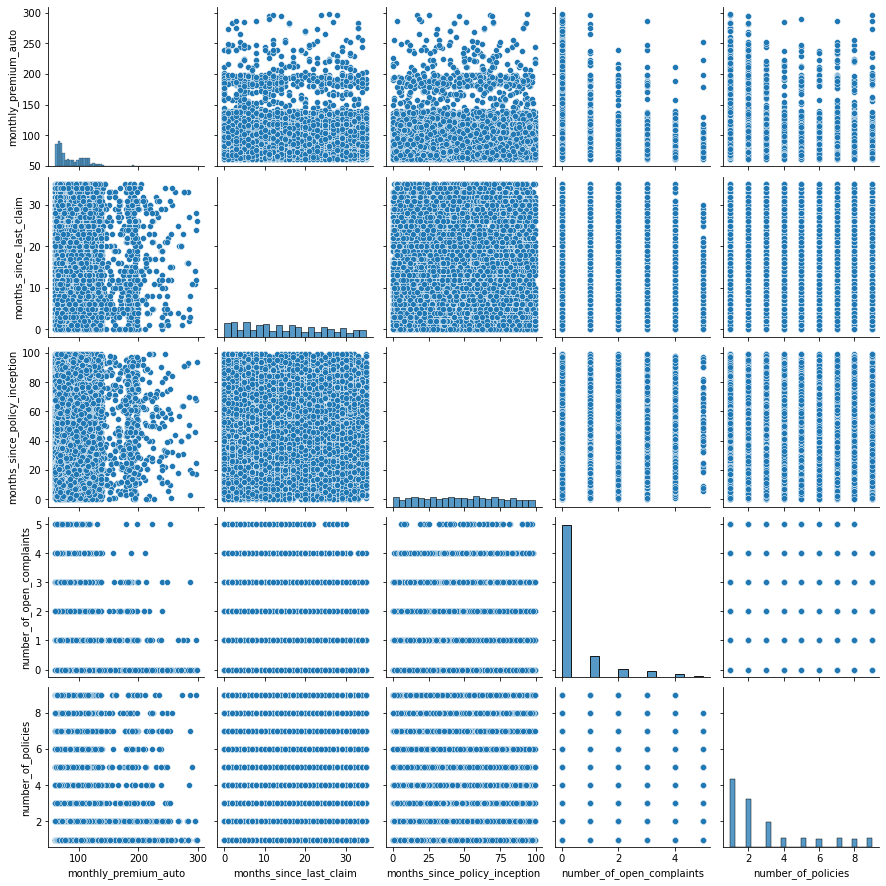

In [16]:
sns.pairplot(discrete)

In [17]:
# 9. Comment what you can see in the plots.
# monthly_premium_auto -->low values predominate
# months_since_last_claim -->values are even distributed
# months_since_policy_inception -->values are even distributed
# number_of_open_complaints --> most persons have 0 open complaints
# number_of_policies--> most people have 3 or less policies

In [18]:
numerical_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [19]:
# 10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)
continuous_df = data[['customer_lifetime_value', 'income', 'total_claim_amount']]
continuous_df.head()

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879


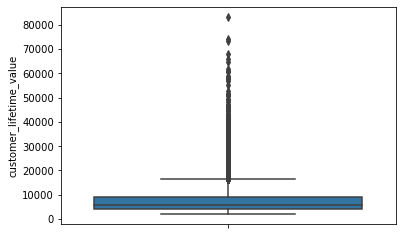

In [20]:
sns.boxplot(y=continuous_df['customer_lifetime_value'])
plt.show()
# outliers > 70.000

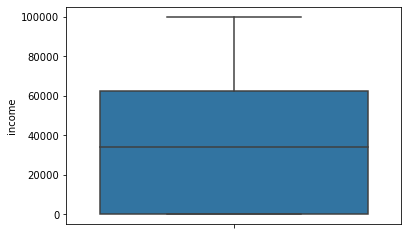

In [21]:
sns.boxplot(y=continuous_df['income'])
plt.show()
# no outliers

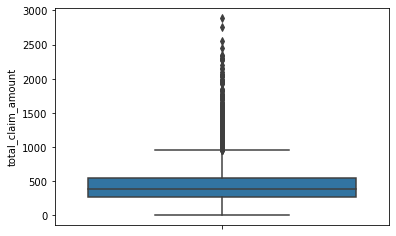

In [22]:
sns.boxplot(y=continuous_df['total_claim_amount'])
plt.show()
# outliers > 2500

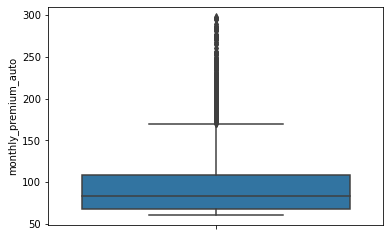

In [23]:
sns.boxplot(y=discrete['monthly_premium_auto'])
plt.show()
# outliers > 2500

In [24]:
# 11. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.
# see above
numerical_dropped_outliers = numerical_df[numerical_df['customer_lifetime_value'] <= 70000].copy()
# numerical_dropped_outliers = numerical_df[numerical_df['total_claim_amount'] <= 2500].copy() # don't drop outliers-->target
numerical_dropped_outliers = numerical_df[numerical_df['monthly_premium_auto'] <= 270].copy()

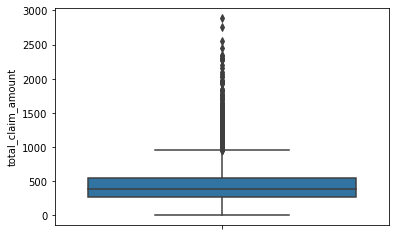

In [25]:
sns.boxplot(y=numerical_dropped_outliers['total_claim_amount'])
plt.show()
# outliers > 2500

In [26]:
# 12. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [27]:
# 13. Save the numerical_df to csv as numerical.csv You will use this file again this week.
numerical_dropped_outliers.to_csv('numerical.csv')

### Lab | Cleaning categorical data

##### 1) Open the notebook created for Lab-cleaning-numerical-data.

##### 2) Find all of the categorical data. Save it in a categorical_df variable.

##### 3) Check for NaN values and decide what to do with them, do it now.

##### 4) Check all unique values of columns.

##### 5) Check dtypes. Do they all make sense as categorical data?

##### 6) Does any column contain alpha and numeric data? Decide how to clean it and do it now.

##### 7) Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.

##### 8) Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

##### 9) Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

##### 10) Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [28]:
# 1) Open the notebook created for Lab-cleaning-numerical-data.

In [29]:
# 2) Find all of the categorical data. Save it in a categorical_df variable.
data.head()
data.columns
data.dtypes
categorical_df = data.select_dtypes('object')
categorical_df
categorical_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [30]:
# 3) Check for NaN values and decide what to do with them, do it now.
categorical_df.isnull().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [31]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [32]:
# 4) Check all unique values of columns.

In [33]:
categorical_df['customer'].unique() 

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

In [34]:
categorical_df["customer"].value_counts(dropna=False)

BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64

In [35]:
categorical_df['state'].unique() 
categorical_df["state"].value_counts(dropna=False)

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [36]:
categorical_df['response'].unique()  
categorical_df["response"].value_counts(dropna=False)

No     7826
Yes    1308
Name: response, dtype: int64

In [37]:
categorical_df['coverage'].unique()  
categorical_df["coverage"].value_counts(dropna=False)

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [38]:
categorical_df['education'].unique()  
categorical_df["education"].value_counts(dropna=False)

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [39]:
categorical_df['employmentstatus'].unique()  
categorical_df["employmentstatus"].value_counts(dropna=False)

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [40]:
categorical_df['gender'].unique()  
categorical_df["gender"].value_counts(dropna=False)

F    4658
M    4476
Name: gender, dtype: int64

In [41]:
categorical_df['location_code'].unique()  
categorical_df["location_code"].value_counts(dropna=False)

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [42]:
categorical_df['marital_status'].unique()  
categorical_df["marital_status"].value_counts(dropna=False)

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [43]:
categorical_df['policy_type'].unique()  
categorical_df["policy_type"].value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [44]:
categorical_df['policy'].unique()  
categorical_df["policy"].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [45]:
categorical_df['renew_offer_type'].unique()  
categorical_df["renew_offer_type"].value_counts(dropna=False)

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [46]:
categorical_df['sales_channel'].unique()  
categorical_df["sales_channel"].value_counts(dropna=False)

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [47]:
categorical_df['vehicle_class'].unique()  
categorical_df["vehicle_class"].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [48]:
categorical_df['vehicle_size'].unique()  
categorical_df["vehicle_size"].value_counts(dropna=False)

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [49]:
# 5) Check dtypes. Do they all make sense as categorical data?

In [50]:
categorical_df.dtypes
# Yes, except 'customer'

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [51]:
# 6) Does any column contain alpha and numeric data? Decide how to clean it and do it now.
categorical_df = categorical_df.drop(['customer'], axis=1)
categorical_df.dtypes

state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [52]:
# 7) Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions and do it now.
categorical_df["education"].value_counts(dropna=False)

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [53]:
def clean(x):
    if x in ['Master', 'Doctor']:
        return 'Pro'
    else:
        return x
categorical_df['education'] = list(map(clean, categorical_df['education']))
categorical_df["education"].value_counts(dropna=False)


Bachelor                2748
College                 2681
High School or Below    2622
Pro                     1083
Name: education, dtype: int64

In [54]:
categorical_df["employmentstatus"].value_counts(dropna=False)

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [55]:
def clean(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']:
        return 'Medical Leave, Disabled or Retired'
    else:
        return x
categorical_df['employmentstatus'] = list(map(clean, categorical_df['employmentstatus']))
categorical_df["employmentstatus"].value_counts(dropna=False)

Employed                              5698
Unemployed                            2317
Medical Leave, Disabled or Retired    1119
Name: employmentstatus, dtype: int64

In [56]:
categorical_df["policy"].value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [57]:
def clean(x):
    if x.startswith('P'):
        return 'Personal'
    elif x.startswith('C'):
        return 'Corporate'
    else:
        return 'Special'
categorical_df['policy'] = list(map(clean, categorical_df['policy']))
categorical_df["policy"].value_counts(dropna=False)

Personal     6788
Corporate    1968
Special       378
Name: policy, dtype: int64

In [58]:
categorical_df["vehicle_class"].value_counts(dropna=False)

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [59]:
def clean(x):
    if x.startswith('S'):
        return 'Expenciv Car'
    elif x.startswith('L'):
        return 'Expenciv Car'
    else:
        return x
categorical_df['vehicle_class'] = list(map(clean, categorical_df['vehicle_class']))
categorical_df["vehicle_class"].value_counts(dropna=False)

Four-Door Car    4621
Expenciv Car     2627
Two-Door Car     1886
Name: vehicle_class, dtype: int64

In [63]:
# 8) Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# drop policy
categorical_df[['policy_type', 'policy']]


,policy_type,policy
0,Corporate Auto,Corporate
1,Personal Auto,Personal
2,Personal Auto,Personal
3,Corporate Auto,Corporate
4,Personal Auto,Personal
...,...,...
9129,Personal Auto,Personal
9130,Corporate Auto,Corporate
9131,Corporate Auto,Corporate
9132,Personal Auto,Personal


In [64]:
# 9) Check number of unique values in each column, can they be combined in any way to ease encoding? 
#    Comment your thoughts and make those changes.
categorical_df = categorical_df.drop(['policy_type'], axis=1)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Offer1,Call Center,Expenciv Car,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Offer1,Agent,Four-Door Car,Medsize


In [ ]:
# 10) Save the cleaned catagorical dataframe as categorical.csv You will use this file again this week.

In [65]:
categorical_df.to_csv('categorical.csv')